In [1]:
"""
References
1. https://www.analyticsvidhya.com/blog/2017/06/architecture-of-convolutional-neural-networks-simplified-demystified/
2. 
"""
def check_basiclibs():
    print ('Checking all basic libs')

    import os
    import numpy as np
    import pandas as pd
    import scipy
    import sklearn
    import cv2
    import joblib
    import random
    import matplotlib.pyplot as plt
    %matplotlib inline

    print ('Imported the basic libs ...')

    import keras
    from keras.models import Sequential

if __name__ == "__main__":
    check_basiclibs()

Checking all basic libs


ImportError: No module named 'cv2'

In [7]:
# import os
# import scipy.ndimage as spimg
# import cv2
# import sys
# import numpy as np
# import pickle
# import joblib
# import random
# import matplotlib.pyplot as plt
# %matplotlib inline

# SPLIT DATA INTO BATCHES
def get_data(dir_filenames, dir_path, label, filename, file_splits=4, filename_extension='.gz', obj_resize = (300,300)):
    labels_all = []
    dir_filenames_done = 0
    
    dir_filenames_blockssize = int(len(dir_filenames)/file_splits)
    dir_filenames_lists = [dir_filenames[i*dir_filenames_blockssize : i*dir_filenames_blockssize + dir_filenames_blockssize] for i in range(0, file_splits+1)]
    
    print ('0. Total Number of files:', len(dir_filenames))
    print ('0. Batches and their sizes:', [len(each) for each in dir_filenames_lists], '\n')
    
    for j, dir_filenames_list in enumerate(dir_filenames_lists):
        print ('\n0.  ---------------> BATCH NUM:', j+1, ' Total Images:', len(dir_filenames_list))
        print ('0. Sample Filenames:', dir_filenames_list[:10])
        labels = []
        objs = []
        if len(dir_filenames_list):
            for i, file in enumerate(dir_filenames_list):
                if i % 500 == 0:
                    print ('1. Reading... ', i, '/', len(dir_filenames_list))
                obj = spimg.imread(dir_path + file, flatten=True, mode='L')
                objs.append(obj)
                labels.append(label)

            ## PRINT INFO ON OBJECTS
            rand_idx = random.randint(1,len(dir_filenames_list))
            print ('2. Total Images :', len(objs))
            print ('2. Single Image Size (bytes):', sys.getsizeof(objs[rand_idx]), '\n')

            ## RESIZE ABOVE OBJECTS
            tot_objs = len(objs)
            for i in range(0,tot_objs):
                if i % 500 == 0:
                    print ('3. Resizing...', i, '/', tot_objs)
                # objs[i] = cv2.resize(objs[i], obj_resize, interpolation=cv2.INTER_NEAREST).flatten()
                objs[i] = cv2.resize(objs[i], obj_resize, interpolation=cv2.INTER_NEAREST)
                """
                INTER_NEAREST - a nearest-neighbor interpolation
                INTER_LINEAR - a bilinear interpolation (used by default)
                (shrinking)INTER_AREA - resampling using pixel area relation. It may be a preferred method for image decimation, as it gives moire’-free results. But when the image is zoomed, it is similar to the INTER_NEAREST method.
                (shrinking)INTER_CUBIC - a bicubic interpolation over 4x4 pixel neighborhood
                INTER_LANCZOS4 - a Lanczos interpolation over 8x8 pixel neighborhood
                """

            print ('3. Image Size (resized) (bytes):', sys.getsizeof(objs[rand_idx]))

            ## PRINT INFO ON RESIZED OBJECTS
            objs_numpy = np.array(objs, dtype=np.int)
            print ('4. Final Object Array (ByteSize):', objs_numpy.itemsize)
            print ('4. Final Object Array:', objs_numpy.shape, '\t Memory:', objs_numpy.nbytes/1024.0/1024.0, ' MB')
            print ('4. Final Object Array (Single Sample)', objs_numpy[rand_idx])

            ## STORE RESIZED OBJECTS
            filename_tmp = filename + '_' + str(j+1) + filename_extension
            with open(filename_tmp, 'wb') as handle:
                # pickle.dump(objs_numpy, handle, protocol=-1)
                # np.save(handle, objs_numpy, allow_pickle=True)
                joblib.dump(objs_numpy, handle, compress=True)
                print ('5. Finished writing file : ', filename_tmp)
                labels_all.extend(labels)
                dir_filenames_done += len(dir_filenames_list)
                print ('5. Total Files Done:', dir_filenames_done, '/', len(dir_filenames))
            
        
    return labels

# SAMPLE BATCHES
def get_data_sample(dir_filenames, dir_path, label, filename, obj_resize = (300,300), idx_data = 1000):
    labels = []
    objs = []
    for i, file in enumerate(dir_filenames[:idx_data]):
        if i % 500 == 0:
            print ('1. Reading... ', i, '/', len(dir_filenames))
        obj = spimg.imread(dir_path + file, flatten=True, mode='L')
        objs.append(obj)
        labels.append(label)
    
    rand_idx = random.randint(1,len(dir_filenames[:idx_data]))
    # print ('Total Size (MB)', (np.array(objs).nbytes*1.0)/1024.0/1024.0)
    print ('2. Total Images :', len(objs))
    print ('2. Single Image Size (bytes):', sys.getsizeof(objs[rand_idx]), '\n')
    
    tot_objs = len(objs)
    for i in range(0,tot_objs):
        if i % 500 == 0:
            print ('3. Resizing...', i, '/', tot_objs)
        # objs[i] = cv2.resize(objs[i], obj_resize, interpolation=cv2.INTER_NEAREST).flatten()
        objs[i] = cv2.resize(objs[i], obj_resize, interpolation=cv2.INTER_NEAREST)
        
    
    print ('3. Image Size (resized) (bytes):', sys.getsizeof(objs[rand_idx]))
    
    objs_numpy = np.array(objs, dtype=np.int)
    print ('4. Final Object Array (ByteSize):', objs_numpy.itemsize)
    print ('4. Final Object Array:', objs_numpy.shape, '\t Memory:', objs_numpy.nbytes/1024.0/1024.0, ' MB')
    print ('4. Final Object Array', objs_numpy[rand_idx])
    
    with open(filename, 'wb') as handle:
        # pickle.dump(objs_numpy, handle, protocol=-1)
        # np.save(handle, objs_numpy, allow_pickle=True)
        joblib.dump(objs_numpy, handle, compress=True)
        
    return labels

## SAMPLE DATA
def view_sample_data(dir_filenames, dir_path, label, filename, obj_resize = (300,300), idx_data = 1000):
    f, axarr = plt.subplots(1,2, figsize=(11,11))
    rand_idx = random.randint(1,len(dir_filenames))
    for i, file in enumerate(dir_filenames):
        if i == rand_idx:
            print ('Image Name:', file)
            obj = spimg.imread(dir_path + file, flatten=True, mode='L')
            sample = np.array(obj)
            print ('Sample data (Original): ', sample, sample.shape)
            axarr[0].imshow(sample, cmap = plt.cm.gray)

            obj_resize  = cv2.resize(obj, obj_resize, interpolation=cv2.INTER_NEAREST)
            # obj_resize  = cv2.resize(obj, obj_resize, interpolation=cv2.INTER_AREA)
            print ('Sample Data (Resized)', obj_resize)
            obj_resize_numpy = np.array(obj_resize, dtype=np.int)
            print ('Sample Data (resized)', obj_resize_numpy, obj_resize_numpy.shape)
            axarr[1].imshow(obj_resize_numpy, cmap = plt.cm.gray)
            
            print ('-------- BYTES -------')
            print ('Original Array (bytes):', sys.getsizeof(obj), ' MB:', sys.getsizeof(obj)/1024.0/1024.0)
            print ('Resized Array (bytes):', sys.getsizeof(obj_resize), ' MB:', sys.getsizeof(obj_resize)/1024.0/1024.0)
            print ('Resized Array (bytes) (numpy) (sys.getsizeof):', sys.getsizeof(obj_resize_numpy))
            print ('Resized Array (bytes) (numpy) (np.nbytes):', obj_resize_numpy.nbytes)

            break
    

## CATS YO!
##dir_filenames = os.listdir('../data/train/cats/')
dir_filenames = os.listdir('/media/')
dir_path = '../data/train/cats/'
label = 0
dump_filename = 'data/cats/cats'
# view_sample_data(dir_filenames, dir_path, label, filename)
# labels_cats = get_data_sample(dir_filenames, dir_path, label, filename)
labels_cats = get_data(dir_filenames, dir_path, label, dump_filename, file_splits = 4, obj_resize = (100,100))


## DOGS YO!
# dir_filenames = os.listdir('../data/train/dogs/')
# dir_path = '../data/train/dogs/'
# label = 0
# dump_filename = 'data/dogs/dogs'
# view_sample_data(dir_filenames, dir_path, label, dump_filename, obj_resize = (100,100))
# labels_dogs = get_data_sample(dir_filenames, dir_path, label, filename)
# labels_dogs = get_data(dir_filenames, dir_path, label, dump_filename, file_splits = 4, obj_resize = (100,100))

0. Total Number of files: 12500
0. Batches and their sizes: [3125, 3125, 3125, 3125, 0] 


0.  ---------------> BATCH NUM: 1  Total Images: 3125
0. Sample Filenames: ['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg']
1. Reading...  0 / 3125
1. Reading...  500 / 3125
1. Reading...  1000 / 3125
1. Reading...  1500 / 3125
1. Reading...  2000 / 3125
1. Reading...  2500 / 3125
1. Reading...  3000 / 3125
2. Total Images : 3125
2. Single Image Size (bytes): 748112 

3. Resizing... 0 / 3125
3. Resizing... 500 / 3125
3. Resizing... 1000 / 3125
3. Resizing... 1500 / 3125
3. Resizing... 2000 / 3125
3. Resizing... 2500 / 3125
3. Resizing... 3000 / 3125
3. Image Size (resized) (bytes): 40112
4. Final Object Array (ByteSize): 4
4. Final Object Array: (3125, 100, 100) 	 Memory: 119.20928955078125  MB
4. Final Object Array (Single Sample) [[ 96 155 159 ..., 181 181 179]
 [ 99 157 181 ..., 181 181 

Idx: 1662
Class: [ 1.  0.]
dog


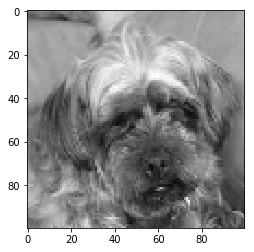

In [58]:
## 1.GET DATA
import joblib
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

"""
Here we shall be creating a mixed data set of dogs + cats.
We originally broke down the data into multiple files
In each epoch we pick one dataset each from dog and cat, and train the CNN
"""

class getData():
    def __init__(self, verbose=1):
        self.X_train = []
        self.y_train_list = []
        self.y_train = []
        self.verbose = verbose
    
    ## FETCH THE PROCESSED DATASETS
    def get_data_training(self, data_idx):
        print ('-------------------------------------------------> Dataset to be pulled:', data_idx)
        if self.verbose : f, axarr = plt.subplots(1,2)
            
        ## DOGS (class = 0)
        dir_name = 'data/dogs/'
        dir_filenames = os.listdir(dir_name)
        # if self.verbose : print ('1. Dogs:', dir_filenames) 
        for i, dir_file in enumerate(dir_filenames):
            if i == data_idx - 1:
                tmp_filename = dir_name + dir_file
                if self.verbose : print ('1. Dogs Dataset:', tmp_filename)
                with open(tmp_filename, 'rb') as handle:
                    data_dogs = joblib.load(handle)
                    idx_random = np.random.randint(0,len(data_dogs))
                    if self.verbose : axarr[0].imshow(data_dogs[idx_random], cmap = plt.cm.gray)
                    data_dogs = data_dogs.reshape((data_dogs.shape[0], 1, data_dogs.shape[1], data_dogs.shape[2]))
                    # data_dogs = data_dogs.reshape((data_dogs.shape[0], data_dogs.shape[1], data_dogs.shape[2]))
                    label_dogs = np.full((data_dogs.shape[0],), 0)

        ## CATS (class = 1)
        dir_name = 'data/cats/'
        dir_filenames = os.listdir(dir_name)
        # if self.verbose : print ('2. Cats:', dir_filenames) 
        for i, dir_file in enumerate(dir_filenames):
            if i == data_idx - 1:
                tmp_filename = dir_name + dir_file
                if self.verbose : print ('1. Cats Dataset:', tmp_filename)
                with open(tmp_filename, 'rb') as handle:
                    data_cats = joblib.load(handle)
                    idx_random = np.random.randint(0,len(data_cats))
                    if self.verbose : axarr[1].imshow(data_cats[idx_random], cmap = plt.cm.gray)
                    data_cats = data_cats.reshape((data_cats.shape[0], 1, data_cats.shape[1], data_cats.shape[2]))
                    # data_cats = data_dogs.reshape((data_cats.shape[0], data_cats.shape[1], data_cats.shape[2]))
                    label_cats = np.full((data_cats.shape[0],),1)

        if self.verbose : print ('3. Raw data shape:', data_dogs.shape, data_cats.shape)
        if self.verbose : print ('3. Raw data labels shape:', label_dogs.shape, label_cats.shape)
        self.X_train = np.append(data_dogs, data_cats, axis = 0)
        self.y_train_list = np.append(label_dogs, label_cats, axis = 0)
        data_dogs = []
        data_cats = []
        if self.verbose : print ('4. Final training set:', self.X_train.shape, self.y_train_list.shape)
        if self.verbose : print ('4. Final training set size:', self.X_train.nbytes/1024.0/1024.0, 'MB')

        from keras.utils import np_utils
        self.y_train = np_utils.to_categorical(self.y_train_list, 2)
        if self.verbose : print ('5. Final training labels: ',self.y_train.shape)
        
        randomize = np.arange(len(self.X_train))
        np.random.shuffle(randomize)
        self.X_train = self.X_train[randomize]
        self.y_train_list = self.y_train_list[randomize]
        self.y_train = self.y_train[randomize]
        if self.verbose : print ('Dataset randomized')
        
        

        # return self.X_train, self.y_train_list
    
    ## Verify data
    def validate_data(self, KERAS_BOOL):
        if KERAS_BOOL:
            idx_random = random.randint(0, len(self.X_train))
            X_train_temp = self.X_train[idx_random][0]
            y_train_temp = self.y_train[idx_random]
            plt.imshow(X_train_temp, cmap = plt.cm.gray)
            print ('Idx:', idx_random)
            print ('Class:', y_train_temp)
            print ('cat' if y_train_temp[1] == 1 else 'dog')
        else:
            idx_random = random.randint(0, len(X_train))
            X_train_temp = self.X_train[idx_random][0]
            y_train_temp = self.y_train_list[idx_random]
            plt.imshow(X_train_temp, cmap = plt.cm.gray)
            print ('Idx:', idx_random)
            print ('Class:', y_train_temp)
            print ('Animal:','cat' if y_train_temp == 1 else 'dog')

# KERAS_BOOL = 1
# validate_data(KERAS_BOOL)

# data_idx = 0
# X_train, y_train_list = get_data_training(data_idx)

if __name__ == "__main__":
#     obj = getData()
#     obj.get_data_training(2)
#     X_train = obj.X_train
#     y_train = obj.y_train
#     print ('Data Shapes:', X_train.shape, y_train.shape)
    obj.validate_data(1)